In [1]:
import sys
sys.path.append('..')
import nbimport
nbimport.initialize()

In [2]:
from Stat_09 import *
css_styling()

# Sandsynlighedsfordeling

# Probability distributions

## Formål 

- At formulerer begrebet _sandsynlighedsfordeling_ mere formelt 
- At formulerer begrebet om en _kumulativ fordelingsfunktion_ ud fra en sandsynlighedsfordeling
- At forbinde begrebet om en stokastisk variabel med sandsynlighedsfordeling 
- At kunne trække tilfældige tal fra en given sandsynlighedsfordeling 

## Purpose

- To formulate the concept of _probability distribution_ more formally
- To formulate the concept of a _cumulative distribution function_ based on a probability distribution
- To connect the concept of a stochastic variable with probability distribution
- To be able to draw random numbers from a given probability distribution

## PDF

I statistik er en stokastisk variabel $X$ en som har en _sandsynlighedsfordeling_ $f_X:\Omega\rightarrow \mathbb{R}$.   En sådan sandsynlighedsfordeling kaldes på engelsk en [_Probability Density Function_](https://en.wikipedia.org/wiki/Probability_density_function) eller PDF.  Her er $\Omega$ udfaldsrummet for den tilfældige variabel (se [her](#Statistiske-variable)) $X$, og $f_X$ afbilleder altså udfald over i de reelle tal. 

Hvis $X$ er fordelt efter $f_X$, så beskriver 

## PDF

In statistics, a random variable $X$ is one that has a _probability distribution_ $f_X:\Omega\rightarrow \mathbb{R}$. Such a probability distribution is also called a [Probability Density Function](https://en.wikipedia.org/wiki/Probability_density_function) or PDF. Here, the $\Omega$ is the set of possible values for the random variable (see [here](#Statistical-Variables)) $X$, and $f_X$ thus maps values into the real numbers.

If $X$ is distributed by $f_X$, then

$$
P(x_1<x<x_2) = \int_{x_1}^{x_2} \mathrm{d}x\, f_X(x)\quad,
$$ 

_sandsynligheden_ for at et tilfældigt tal trukket fra denne fordeling er mellem $x_1$ og $x_2$. Bemærk at 

describes _the probability_ that a random number drawn from this distribution is between $x_1$ and $x_2$. notice that

$$\int_\Omega \mathrm{d}x\, f_X(x) = 1\quad,$$

hvor $\Omega$ er det domæne $f_X$ er defineret på - altså udfaldsrummet, og at 

where $\Omega$ is the domain $f_X$ is defined on - i.e., the set of possible values, and that

$$
\forall x_0\in D: P(x=x_0)=\int_{x_0}^{x_0}\mathrm{d}x\, f_X(x) = 0\quad.
$$

Vi kan altså i nogen forstand forstå en stokastisk variabel $X$ som det samme som en sandsynlighedsfordeling, sådan som vi hentydet tidligere ([her](#Statistiske-variable)).

We can in some sense understand a stochastic variable $X$ as a probability distribution, as we mentioned earlier ([here](#Statistical-Variables)).

## CDF

Hvis vi definerer 

## CDF

If we define

$$
F_X(x) = \int_{-\infty}^{x} \mathrm{d}x'\, f_X(x')\quad,
$$

også kaldet den _kumulative fordelingsfunktion_ eller [_Cumulative Distribution Function_](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF), 
har vi at 

also called the [_Cumulative Distribution Function_](https://en.wikipedia.org/wiki/Cumulative_distribution_function)  or CDF, we have that

$$f_X(x) = \frac{\mathrm{d}}{\mathrm{d}x}F_X(x)\qquad\text{informally}\quad 
\mathrm{d}x\, f_X(x) = \mathrm{d}F_X(x)\quad,$$

hvilket understreger at en PDF er en _tæthedsfunktion_. 

Den kumulative tæthedsfunktion $F_X(x)$ beskriver sandsynligheden for at trække et tal der er $x$ _eller mindre_. 

which emphasizes that a PDF is a _density function_.

The cumulative density function $F_X(x)$ describes the probability of drawing a number that is $x$ _or less_.

### Eksempel: Den flade fordeling 

Sandsynlighedsfordelingen 

### Example: The flat distribution

The probability distribution

$$
f_U(x) = 1\qquad\text{for}\quad x\in[0,1)
$$

In [3]:
from sympy import symbols, Lambda,integrate
x, t = symbols("x t",real=True)
fU = Lambda(x,1)
fU

Lambda(x, 1)

kaldes ofte den flade fordeling.  Alle tal mellem 0 og 1 er lige sandsynlige, og den kumulative tæthedsfunktion er givet ved 

is often called the flat (or uniform) distribution. All numbers between 0 and 1 are equally likely and the cumulative density function is given by

In [4]:
integrate(fU(t),(t,0,x))

x

$$
F_U(x) = x\qquad\text{for}\quad x\in[0,1)
$$

Er en stokastisk variabel $X$ fladt fordelt over $[0,1]$ skriver vi ofte 

If a stochastically variable $X$ is distributed uniformly over $[0,1]$ we often write

$$
X\sim U\quad,
$$

hvor $U$ er for _uniform_. 

where $U$ is for _uniform_.

### Eksempel: Normalfordelingen

Hvis en stokastisk variabel $X$ er _normal fordelt_ skriver vi ofte 

### Example: Normal distribution

If a random variable $X$ is _normal distributed_, we often write

$$
X \sim N\quad.
$$

PDF for en _normalfordeling_ (eller Gaussisk fordeling) er givet ved 

The PDF of a _normal distribution_ (or Gaussian distribution) is given by

$$
f_N(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}\quad,
$$

In [5]:
from sympy import sqrt as sysqrt, exp as syexp, pi as sypi, S, Integer
fN = Lambda(x,1/sysqrt(Integer(2)*sypi)*syexp(-S.Half*x**2))
fN

Lambda(x, sqrt(2)*exp(-x**2/2)/(2*sqrt(pi)))

med den kumulative tæthedsfunktion 

with the cumulative density function

$$
F_N(x) = \frac{1}{2}\left[1+\operatorname{erf}\left(\frac{x}{\sqrt{2}}\right)\right]\quad.
$$

In [6]:
from sympy import oo
integrate(fN(t),(t,oo,x)).simplify()

-erfc(sqrt(2)*x/2)/2

Her er $\operatorname{erfc}$ kendt som komplimentet til _Error funktion_ $\operatorname{erf}$  og 

Here $\operatorname{erfc}$ is known as the compliment to _Error function_ $\operatorname{erf}$ and

\begin{align*}
\operatorname{erf}(x)&=\frac{2}{\sqrt{\pi}}\int_{0}^{x}\mathrm{d}t\, e^{-t^{2}}&
\operatorname{erfc}(x)&= 1 - \operatorname{erf}(x)
\quad,
\end{align*}

som vi må evaluerer numerisk.

Lad os lave en graf af $f_N$ og $F_N$.  Domænet for begge er $\mathbb{R}$, men da begge har asymptotisk opførelse nøjes vi med at plotte over $x\in[-3,3]$. 

- Vi definerer vores domæne ved brug af `numpy.linspace`. 
- Vi evaluerer $f_N$ på dette domæne ved brug af `numpy.exp` 
- Vi evaluerer $F_N$ på dette domæne ved brug af `scipy.special.erf` 

which we must evaluate numerically.

Let's make a graph of $f_N$ and $F_N$. The domain for both is $\mathbb{R}$, but since both asymptotically approach a constant (zero or one), we only plot over $x\in[-3,3]$.

- We define our domain using `numpy.linspace`.
- We evaluate $f_N$ on this domain using `numpy.exp`
- We evaluate $F_N$ on this domain using `scipy.special.erf`

Sandsynlighedsfordeling og kumulative sandsynlighedsfordeling for en normal fordeling. 

Probability density function and cumulative density function for a normal distribution.

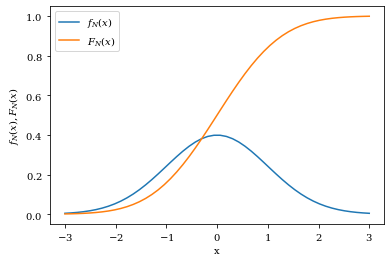

In [7]:
from numpy import linspace, exp, pi, sqrt 
from scipy.special import erf 
from matplotlib.pyplot import plot, xlabel, ylabel, legend 

x = linspace(-3,3)
f = 1/sqrt(2*pi)*exp(-0.5*x**2)
F = 1/2 * (1 + erf(x/sqrt(2)))
plot(x,f,label=r'$f_N(x)$')
plot(x,F,label=r'$F_N(x)$')
xlabel("x")
ylabel(r"$f_N(x),F_N(x)$")
legend();

## Tilfældige tal fra en PDF

## Random numbers from a PDF

Bemærk på grund af normaliseringskravet til en PDF følger det at CDF'en $F$ er monotonisk stigende fra 0 til 1.  Det betyder at vi kan trække et tilfældigt tal fra en PDF ved at følge følgende algoritme 

1. Vælg et tilfædligt tal $y$ mellem 0 og 1
2. Evaluer $F_X^{-1}(y)=x$.  $x$ er da et tilfældigt tal trukket fra fordelingen $f$ 

Det betyder at vi forholdsvis nemt kan trække et tilfældigt tal fra en given PDF.  Den inverse kumulative tæthedsfunktion kaldes også _kvantil funktionen_ (_Quantile function_). 

Note that due to the normalization requirement of a PDF, it follows that the CDF $F$ is monotonically increasing from 0 to 1. This means that we can draw a random number from a PDF by the following algorithm

1. Select a random number $y$ between 0 and 1
2. Evaluate $F_X^{-1}(y)=x$. $x$ is then a random number drawn from the distribution $f$

This means that we can relatively easily draw a random number from a given PDF. The inverse cumulative density function is also called the _quantile function_ (_Quantile function_).

### Eksempel: Breit-Wigner 

Lad os betragte en Brett-Wigner sandsynlighedsfordeling med PDF 

### Example: Breit-Wigner

Let us consider a Brett-Wigner probability distribution 

$$
f_{BW}(E) = \frac{k}{\left(E^2-M^2\right)^2+M^2\Gamma^2}\quad, 
$$

hvor $k$ er en proportionalitetsfaktor. 
 
$f_{BW}(E)$ er da sandsynlighedstætheden for at finde en partikel med massen $M$ og levetid $\tau=1/\Gamma$ ved en produktionsenergi på $E$.  Denne PDF har _parametrene_ $M$, $\Gamma$ og $k$, vi skriver derfor ofte 

where $k$ is a proportionality factor.
 
$f_{BW}(E)$ is then the probability density to find a particle with the mass $M$ and lifetime of $\tau=1/\Gamma$ at a production energy of $E$. This PDF has the _parameters_ $M$, $\Gamma$ and $k$, we therefore often write

$$
f_{BW}(E;M,\Gamma,k) = \frac{k}{\left(E^2-M^2\right)^2+M^2\Gamma^2}\quad,
$$

for at tydeligøre disse parametre.  Det ses let, at Breit-Wigner fordelingen er den samme fordeling som en _Cauchy_ (fransk [[koʃi]](https://translate.google.com/?q=Cauchy&hl=en&tab=8T#fr/en/Cauchy)) fordeling

to clarify these parameters. It can easily be seen that the Breit-Wigner distribution is the same distribution as a _Cauchy_ (French [[koʃi]](https://translate.google.com/?q=Cauchy&hl=en&tab=8T#fr/en/Cauchy)) distribution

$$
f_{\text{Cauchy}}(x;x_0,\gamma) = \frac{1}{\pi\gamma}\frac{\gamma^2}{(x-x_0)^2+\gamma^2}\quad,
$$

In [8]:
x, x0 = symbols("x, x_0",real=True)
gamma = symbols("gamma",real=True,positive=True)
fCachy = Lambda(x,1/(sypi*gamma)*gamma**2/((x-x0)**2+gamma**2))
fCachy

Lambda(x, gamma/(pi*(gamma**2 + (x - x_0)**2)))

med $x=E^2$, $x_0=M^2$, $\gamma=M\Gamma$, og $k=\gamma/\pi$.  I $f_{\text{Cauchy}}$ er parameteren $x_0$ den mest sandsynlige værdi, og $\gamma$ er bredden af fordelingen. 

with $x=E^2$, $x_0=M^2$, $\gamma=M\Gamma$, and $k=\gamma/\pi$. In $f_{\text{Cauchy}}$, the $x_0$ parameter is the most probable value, and $\gamma$ is the width of the distribution.

Da $f_{BW}\sim f_{\text{Cachy}}$ kan vi bruge Cachy fordelingen.  Endvidere bemærker vi at $x_0$ parameteriserer hvor maximum af $f_{\text{Cachy}}$, men ellers ikke ændre fordelingen.  Vi kan derfor uden tab af generalitet sætte $x_0=0$. 

Lad os tegne Cachy fordelingen med $\gamma=1$

Since $f_{BW}\sim f_{\text{Cachy}}$ we can use the Cachy distribution. Furthermore, we note that $x_0$ parameterizes where the maximum of $f_{\text{Cachy}}$ is, but otherwise does not change the distribution. We can therefore, without loss of generality, set $x_0=0$.

Let us draw the Cachy distribution with $\gamma=1$

Sandsynlighedsfordeling for en Cachy fordeling. 

Probability density function for a Cachy distribution.

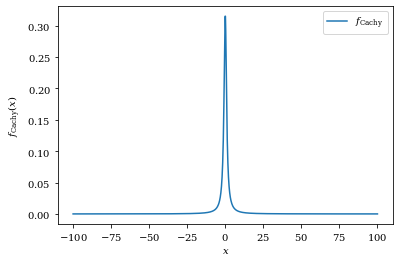

In [9]:
x     = linspace(-100,100,1000)
gamma = 1
x0    = 0
fch   = 1 / (pi*gamma) * gamma**2 / ((x-x0)**2 + gamma**2)
plot(x,fch,label=r'$f_{\mathrm{Cachy}}$')
xlabel(r"$x$")
ylabel(r"$f_{\mathrm{Cachy}}(x)$")
legend();

Cachy fordelingen har den kumulative tæthedsfunktion 

The Cachy distribution has the cumulative density function

$$
F_{\text{Cachy}}(x;x_0,\gamma) = \frac{1}{\pi}\tan^{-1}\left(\frac{x-x_0}{\gamma}\right)+\frac{1}{2}\quad,
$$

In [10]:
x = symbols("x",real=True)
FCachy = Lambda(x,integrate(fCachy(t),(t,-oo,x)))
FCachy

Lambda(x, atan(x/gamma - x_0/gamma)/pi + 1/2)

med den inverse (eller _Quantile function_) givet ved løsningen $x$ til $F_{\mathrm{Cachy}}(x)=y$

with the inverse (or _Quantile function_) given by the solution $x$ to $F_{\mathrm{Cachy}}(x)=y$

$$
F^{-1}_{\text{Cachy}}(y;x_0,\gamma) = x_0 + \gamma\tan\left(\pi\left[y-\frac{1}{2}\right]\right)
$$

In [11]:
from sympy import solve 

y = symbols("y",real=True)
QCachy = Lambda(y,solve(y-FCachy(x),x)[0])
QCachy

Lambda(y, -gamma*cot(pi*y) + x_0)

Bemærk at 

\begin{align*}
\cot\vartheta &= \tan\left(\frac{\pi}2-\vartheta\right) & \tan(-\vartheta)&=-\tan\vartheta\quad.
\end{align*}

Vi kan derfor trække tilfældige tal fra en Cachy fordeling ved at trække et tilfældigt tal $y\sim U$ mellem 0 og 1, og evaluerer $F^{-1}_{\text{Cachy}}(y;x_0,\gamma)$. 

Note that 

\begin{align*}
\cot\vartheta &= \tan\left(\frac{\pi}2-\vartheta\right) & \tan(-\vartheta)&=-\tan\vartheta\quad.
\end{align*}

We can therefore draw random numbers from a Cachy distribution by drawing a random number $y\sim U$ between 0 and 1, and evaluate $F^{-1}_{\text{Cachy}}(y;x_0,\gamma)$.

Lad os forsætte eksemplet ovenover og trække 1000 tal fra en Cachy fordeling med $x_0=0$ og $\gamma=1$.  Vi 

- bruger `nympy.random.random(1000)` til at få 1000 tilfældige tal mellem 0 og 1, og  
- vi beregner de 1000 tal $\sim \text{Cachy}$ ved at evaluerer $F^{-1}_{\text{Cachy}}$ på disse tilfældige tal. 
- Endelig tegner vi fordelingen af disse tal

We continue the example above and draw 1000 numbers from a Cachy distribution with $x_0=0$ and $\gamma=1$. We

- use `numpy.random.random (1000)` to get 1000 random numbers between 0 and 1, and
- we calculate the 1000 numbers $\sim \text{Cachy}$ by evaluating $F^{-1}_{\text{Cachy}}$ on these random numbers.
- Finally, we draw the distribution of these numbers

Tilfældige tal trukket fra en Cachy fordeling. 

Random numbers drawn from a Cachy distribution.

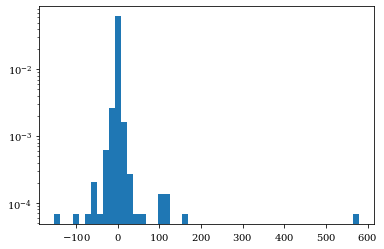

In [12]:
from matplotlib.pyplot import hist, yscale
from numpy import tan
from numpy.random import random

y = random(1000)
o = x0+gamma*tan(pi*(y-0.5))
hist(o,bins=50,density=True)
yscale("log");

Hvis vi _ikke_ kender kvantil funktionen $F_X^{-1}$, eller ikke kan evaluerer denne analytisk, må vi ty til numeriske beregninger.  

Kender vi den kumulative tæthedsfunktion $F_X(x)$ kan vi følge algoritmen 

1. Træk et tilfældigt tal $y$ mellem 0 og 1 
1. Løsningen 

   $$F_X(x) - y = 0$$
   
   over domænet for $F_X$.  Løsningen $x$ til denne ligning er da $x\sim X$.  

If we _do not_ know the quantile function $F_X^{-1}$, or cannot evaluate it analytically, we must resort to numerical calculations.

If we know the cumulative density function $F_X(x)$ we can follow the algorithm

1. Draw a random number $y$ between 0 and 1
1. Find the solution to

   $$F_X(x) - y = 0$$
   
   over the domain of $F_X$. The solution $x$ for this equation is then $x\sim X$.

### Eksempel: Tilfældigt tal fra normalfordelingen

Som tidligere nævnt er den kumulative tæthedsfunktion for normalfordelingen givet ved 

### Example: Random number from normal distribution

As previously mentioned, the cumulative density function for the normal distribution is given by

$$
F_N(x) = \frac{1}{2}\left[1+\operatorname{erf}\left(\frac{x}{\sqrt{2}}\right)\right]\quad.
$$

Vi kender i princippet den inverse 

We in principle know the inverse

$$
F_N^{-1}(x) = \sqrt{2}\operatorname{erf}^{-1}\left(\frac{x}{\sqrt{2}}\right)\quad,
$$

som dog afhænger af vi kan evaluerer $\operatorname{erf}^{-1}$.  Lad os i stedet forsøge os med at finde rødder i ligningen 

which however depends on that we can evaluate $\operatorname{erf}^{-1}$. Instead, let us try to find roots in the equation

$$
F_N(x) - y = 0\quad,
$$

hvor $y\sim U$, og hvor vi sætter domænet af $F_X$ til $[-1000,1000]$

Vi definerer en funktion der, givet en liste af fladt fordelte tal, finder rødderne til ligningen ovenover.  Til at finde rødder bruger vi `scipy.optimize.brentq`. Dernæst finder vi 1000 tal $x\sim N$ og tegner deres fordeling

where $y\sim U$ and where we set the domain of $F_X$ to $[-1000,1000]$

We define a function that, given a list of uniformly distributed numbers, finds the roots of the equation above. To find roots we use `scipy.optimize.brentq`. Next, we find 1000 numbers of $x\sim N$ and draw their distribution

Tilfældige tal trukket fra en normalfordeling

Random numbers drawn from a normal distribution

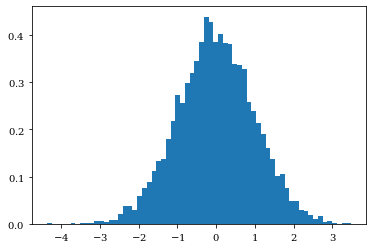

In [13]:
def rannor(y):
    from scipy.special import erf
    from scipy.optimize import brentq 
    
    def f(x,y):
        return 0.5 * (1+erf(x/sqrt(2))) - y
    return [brentq(lambda x: f(x,yy),-1000,1000) for yy in y]

y = random(10000)
hist(rannor(y),bins='auto',density=True);

Kender vi _ikke_ den kumulative tæthedsfunktion, eller er den bøvlet at evaluerer - som f.eks. $F_N$ er - kan vi stadig trække tilfældige tal fra en sandsynlighedsfordeling.   Algoritmen kan beskrives som 

1. Vælg et tilfædligt tal $y$ mellem 0 og 1
2. Find det $x$ så at $F_X(x) = \int_{-\infty}^x\mathrm{d}x' f_X(x')\approx y$.  $x$ er da et tilfældigt tal trukket fra fordelingen $f_X$ 

If we _do not_ know the cumulative density function, or is it hassle to evaluate - such as $F_N$ is - we can still draw random numbers from a probability distribution. The algorithm to do so is described as

1. Select a random number $y$ between 0 and 1
2. Find the $x$ so that $F_X(x) = \int_{-\infty}^x\mathrm{d}x' f_X(x')\approx y$. $x$ is then a random number drawn from the distribution $f_X$

Numerisk kan integralet ovenover være svært at bestemme.  F.eks. kan det være svært at evaluerer det i grænsen af $x\rightarrow-\infty$.  Ofte kan vi dog begrænse vores nedre grænse sådan at $\int_{-\infty}^{L}\mathrm{d}x' f(x')\lt\varepsilon$ er lille for et given $L$.  Numerisk skal vi derfor evaluerer 

Numerically, the integral above can be difficult to determine. For example, it can be difficult to evaluate it in the limit $x\rightarrow-\infty$. However, often we can restrict our lower limit such that $\int_{-\infty}^{L}\mathrm{d}x' f(x')\lt\varepsilon$ is small for a given $L$. Numerically, we must therefore evaluate

$$\int_{L}^{x}\mathrm{d}x' f(x')\quad,$$

hvilket vi f.eks. kan gøre i skridt $\Delta x$ af $x$ 

which we can do in steps $\Delta x$ of $x$

$$\int_{L}^{x}\mathrm{d}x' f_X(x')\approx \Delta x \sum_{i=0}^{N} f_X(L+i\Delta x)\qquad N=\frac{x-L}{\Delta x}$$

Skal vi trække mere en et par tilfældige tal fra fordelingen $f_X$, ser vi at vi ofte kommer til at evaluerer summen over de samme værdier.  Lad os tage et eksempel.  Antag at vi trækker $y_1$ fra den flade fordeling, og af for at finde det $x$ der opfylder at 

If we are to draw more than a few random numbers from the distribution $f_X$, we see that we often evaluate the sum over the same values. Let's take an example. Suppose we pick $y_1$ from the uniform distribution and find the $x$ that fulfill the requirement 

$$\int_{-L}^x\mathrm{d}x' f_X(x')\approx y_1\quad.$$

Her har vi måtte evalurer summen $N_1$ gange.  Lad os nu antage at vi tager det tilfældige tal $y_2>y_1$.  Da $F_X$ er monototisk stigende skal vi evaluerer summen $N_2>N_1$ gange, hvor af vi allerede tidligere har evalueret mindst $N_1$ led.  

Vi er derfor bedre tjent med at beregne serien 

Here we have to evaluate the sum $N_1$ times. Let us now assume that we take the random number $y_2>y_1$. Since $F_X$ is monotonically increasing, we have to evaluate the sum $N_2>N_1$ times, of which we have previously evaluated at least $N_1$ terms.

We are therefore better off calculating the series

$$\{s\} = \left\{\int_{L}^{x_i}\mathrm{d}x' f_X(x')\approx \Delta x \sum_{j=0}^{N_j} f_X(L+j\Delta x),\ N_j=\frac{x_i-L}{\Delta x}\right\}\quad,$$

én gang for alle.  Vi bemærker at 

once and for all. We note that

$$
s_0 = 0\quad s_{i+1} = s_{i}+\Delta x f_X(L)\quad s_N \approx \int_{-\infty}^{\infty}\mathrm{d}x f_X(x) = 1
$$

At trække et tilfældigt tal fra fordelingen $f_X$ består derefter i at 

1. tage et tilfældigt tal $y$ mellem 0 og 1
2. Finde det index $i$ sådan at $s_i\approx y$
3. Beregne (eller på anden måde bestemme) det tilsvarende $x_i=L+i\Delta x$.  $x_i$ er da et tilfældigt tal trukket fra fordelingen $f_X$. 

Denne algoritme har flere interessante muligheder 

1. Vi behøver ikke insisterer på at 

   $$\int_{D} \mathrm{d}x f_X(x) = 1$$
   
   Vi kan altid normaliserer de individuelle $s_i$ med det totale integrale $s_N$ 
   
2. Vi kan nøjes med at bestemme serien $\{s\}$ et overskueligt antal gange.  For at få højere opløsning kan vi interpolerer mellem nabo-værdier af $\{s\}$. 

3. Vores fordeling $f_X$ behøver ikke være givet ved en forskrift, men kan være givet ved f.eks. diskrete punkter - så længe vi kan integrerer over $f_X$ kan vi anvende denne algoritme. 


Extracting a random number from the distribution $f_X$ then consists of

1. Pick a random number $y$ between 0 and 1
2. Find the index $i$ such that $s_i\approx y$
3. Calculate (or otherwise determine) the corresponding $x_i=L+i\Delta x$. $x_i$ is then a random number drawn from the distribution $f_X$.

This algorithm has several interesting points to exploit

1. We do not have to insist that

   $$\int_{D} \mathrm{d}x f_X(x) = 1$$
   
   We can always normalize the individual $s_i$ to the total integral $s_N$
   
2. We only need determine the series $\{s\}$ a reasonable number of times. For higher resolution, we can interpolate between neighboring values of $\{s\}$. That is, we should evaluate the integral no more times than we can consider $F(y)$ is approximately linear. 

3. Our distribution of $f_X$ need not be given by an expression, but may be given by e.g., discrete points - as long as we can integrate over $f_X$ we can use this algorithm.

### Eksempel: Breit-Wigner igen

Vi så tidligere at vi kan trække tilfældige tal fra en Breit-Wigner fordeling ved at bruge Cauchy fordelingen.   Men lad os her arbejde direkte fra $f_{BW}$ givet ved 

### Example: Breit-Wigner again

We saw earlier that we can draw random numbers from a Breit-Wigner distribution using the Cauchy distribution. But let us here work directly from $f_{BW}$ given by

$$
f_{BW}(E) = \frac{k}{\left(E^2-M^2\right)^2+M^2\Gamma^2}\quad.
$$

Da vi som nævnt ovenover ikke behøver at bekymre os om fordelingen er normeret, vælger vi her ikke at specificerer nærmere hvad $k$ er. 

As we mentioned earlier, we do not have to worry about the distribution being normalised, thus we do not have to specify in detail what $k$ is.

Lad os nu definerer en funktion der beregner serien $\{s\}$.  Som input vil vi tage en serie $\{x\}$ af punkter hvor vi vil evaluerer integralet af vores fordeling, og vi vil returnerer serien $\{s\}$ bestående af det den tilnærmet kumulative tæthedsfunktion.

We define a function that calculates the $\{s\}$ series. As input we will take a series of $\{x\}$ of points where we will evaluate the integral of our distribution, and we will return the series $\{s\}$ consisting of the the approximate cumulative density function.

In [14]:
def eval_cdf(f,x,dx=None,adjust=False,
             return_details=False):
    from numpy import diff, cumsum, concatenate, min, any
    if dx is None: dx = diff(x,prepend=x[0])
    fx  = f(x)
    off = 0 
    if any(fx < 0):
        if not adjust:
            raise ValueError('f is not positive over full domain')
        off = -min(fx)
    fx    += off
    uncdf =  cumsum(dx * fx)
    norm  = uncdf.max()
    cdf   = uncdf/norm
    return (cdf,off,norm) if return_details else cdf

Denne funktion kender ikke noget til vores fordeling $f$, andet en at vi kan evaluerer den over $x$. Lad os teste dette på normalfordelingen. 

This function does not know anything about our distribution $f$, other than we can evaluate it over $x$. Let us test this on the normal distribution.

Tilnærmet CDF for en normalfordeling.

Approximate CDF for a normal distribution.

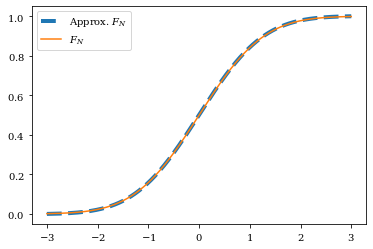

In [15]:
x = linspace(-3,3,1000)
c = eval_cdf(lambda x : 1/(sqrt(2*pi))*exp(-x**2/2), x)
plot(x,c, "--", linewidth=4, label='Approx. $F_N$')
plot(x,0.5 * (1+erf(x/sqrt(2))),label='$F_N$')
legend();


Lad os nu lave en funktion der kan tage et tilfældigt tal fra vores fordelingsfunktion, givet serierne $\{x\}$ og $\{s\}$.  Funktionen tager en liste af tilfældige tal, de to serier, og returnerer en liste med tilfældige tal trukket fra vores fordeling.

Now let's do a function that can draw a random number from our distribution function, given the series $\{x\}$ and $\{s\}$. The function takes a list of random numbers, the two series, and returns a list of random numbers drawn from our distribution.

In [16]:
def sample_pdf(y,x,cdf):
    from numpy import atleast_1d,searchsorted,any

    yy = atleast_1d(y)
    if any(yy < 0) or any(yy > 1):
        raise ValueError(f'Some random number(s) {y} not in [0,1]')
        
    i  = searchsorted(cdf,yy)
    yf = (yy - cdf[i-1]) / (cdf[i]-cdf[i-1])
    return x[...,i-1]+yf*(x[...,i]-x[...,i-1])

In [17]:
def sample_pdf_old(y,x,cdf):
    from bisect import bisect_left as bi 
    from numpy import atleast_1d, array
    
    yy = atleast_1d(y)
    if any(yy < 0) or any(yy > 1):
        raise ValueError(f'Random number(s) {y} not in [0,1]')
    
    def find_inter(y):
        i = bi(cdf,y)
        
        yf = (y - cdf[i-1]) / (cdf[i]-cdf[i-1])
        return x[i-1]+yf*(x[i]-x[i-1])
        
    return array([find_inter(yyy) for yyy in yy])

hide_toggle()

Vi har nu alt vi skal bruge for at trække tilfældige tal fra en sandsynlighedsfunktion.  Først definerer vi vores $f_{BW}$ og det domæne vi vil kigge over. 

We now have everything we need to draw random numbers from a probability function. First we define our $f_{BW}$ and the domain we want to look over.

In [18]:
def fBW(E,M,Gamma,k):
    return k / ((E**2-M**2)**2 + M**2*Gamma**2)
x = linspace(0, 2, 100)

Dernæst evaluer vi vores CDF over `x`.  Her sætter vi $M=1$, $\Gamma=0.05$ og $k=1$.  Vi plotter vores tilnærmet CDF og den analytiske CDF 

Next, we evaluate our CDF over `x`. Here we put $M=1$, $\Gamma=0.05$ and $k=1$. We plot our approximate CDF and the analytical CDF

$$
F_{BW}(E;M,\Gamma,k) = k F_{\text{Cachy}}(E^2;M^2,M\Gamma) = k\left[\frac{1}{\pi}\tan^{-1}\left(\frac{E^2-M^2}{M\Gamma}\right)+\frac{1}{2}\right]\quad.
$$

Tilnærmet CDF af en Breit-Wigner fordeling

Approximate CDF of a Breit-Wigner distribution

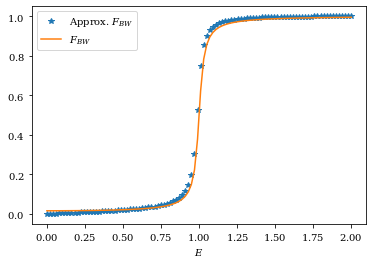

In [19]:
from numpy import arctan

FBW = eval_cdf(lambda E : fBW(E,1,0.05,1),x)
plot(x, FBW, "*",label="Approx. $F_{BW}$")
plot(x, 1/pi * arctan((x**2-1)/(0.05))+.5,label="$F_{BW}$")
xlabel("$E$")
legend();

Lad os nu lave 1000 tilfældige tal trukket fra vores Breit-Wigner 

Now let's generate 1000 random numbers drawn from our Breit-Wigner

Tilfældige tal trukket fra en Breit-Wigner fordeling. 

Random numbers drawn from a Breit-Wigner distribution.

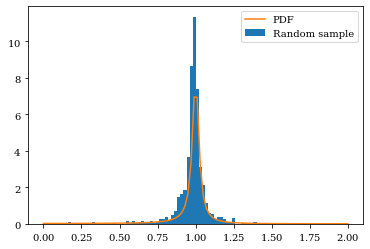

In [20]:
from numpy.random import random 
from matplotlib.pyplot import hist

dBW = sample_pdf(random(1000),x,FBW)
hb, b, _ = hist(dBW, 100, (x[0],x[-1]),density=True,label="Random sample")
plot(x,fBW(x,1,0.05,(x[1]-x[0])),label="PDF")
legend();

Faktisk kan vi med lidt snilde forene `eval_cdf` og `sample_pdf` ind i én funktion.  Eller rettere, vi kan lave en funktion som returnere en _ny_ funktion (en såkaldt _closure_) som, når vi evaluerer den, laver prøver fra vores PDF. 

In fact, with a little cunning, we can combine `eval_cdf` and` sample_pdf` into _one_ function. Or rather, we can create a function that returns a _new_ function (a so-called _closure_) which when we evaluate it, samples from our PDF.

In [21]:
def pdf_sampler(f,x,dx=None):
    cdf = eval_cdf(f,x,dx)
    
    def sampler(y):
        return sample_pdf(y,x,cdf)
    
    return sampler

Pointen er, at den indre funktion `sampler` har variablene `x` og `cdf` bundet til de værdier de har når funktionen blev defineret (altså, når vi kalder `pdf_sampler`).  Vi giver denne funktion, med de bundne værdier af `x` og `cdf` tilbage, og når vi så kalder den funktion bruges de bundne værdier. 

The point is that the inner function `sampler` has the variables `x` and `cdf` bound to the values they have when the function was defined (i.e., when we call `pdf_sampler`). We return this function, with the bound values of `x` and `cdf`, and when we call _that_ function, the bound values are used.

Lad os prøve det på vores Breit-Wigner.  

Let's try it on our Breit-Wigner.

Tilfældige tal trukket fra en Breit-Wigner fordeling. 

Random numbers drawn from a Breit-Wigner distribution.

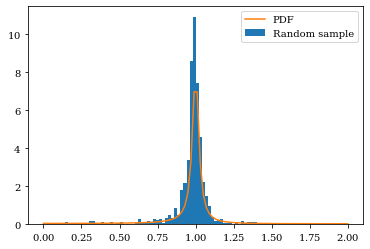

In [22]:
from numpy.random import random 
from matplotlib.pyplot import hist

bw_sampler = pdf_sampler(lambda E : fBW(E,1,0.05,1),x)
dBW        = bw_sampler(random(1000))
hb, b, _   = hist(dBW, 100, (x[0],x[-1]),density=True,label="Random sample")
plot(x,fBW(x,1,0.05,(x[1]-x[0])),label="PDF")
legend();

### _SciPy_ tilfældig variabel 

### _SciPy_ random variable

Vi vil implementerer en generel tilfældig variabel evalueret numerisk som ovenover som passer ind i _SciPy_'s system.  Vi definerer derfor en klasse `rv_numerical` som arver fra `scipy.stats.rv_continuous` og implementerer metoder til at evaluerer PDF'en $f$ (`_pdf`), CDF'en $F$ (`_cdf`), og den inverse CDF $Q$ (`_ppf`).

We will implement a general random variable evaluated numerically as above which fits into _SciPy_'s interface. We therefore define a class `rv _numerical` that inherits from` scipy.stats.rv_ continuous` and implement methods to evaluate the PDF $f$ (`_pdf`), the CDF $F$ ( `_ cdf`), and the inverse CDF $Q$ (` _ppf`).

Tilfældige tal trukket fra en Fourier fordeling

Random numbers drawn from a Fourier distribution.

In [23]:
from scipy.stats import rv_continuous

class rv_numerical(rv_continuous):
    def __init__(self,f,xev,dx=None,adjust=True,*args,**kwargs):
        a      = kwargs.pop('a',xev[...,0])
        b      = kwargs.pop('b',xev[...,-1])
        
        super(rv_numerical,self).__init__(*args,a=a,b=b,**kwargs)
        
        self._x              = xev 
        self._f              = f 
        self._cdf, self._off, self._norm = \
            eval_cdf(self._f,self._x,
                     dx,adjust,
                     return_details=True)
        
    def _pdf(self,x,*args):
        return (self._f(x) + self._off) / self._norm
    
    def _cdf(self,x,*args):
        from numpy import searchsorted
        
        i  = searchsorted(self._x,x)
        xf = (x - self._x[i-1]) / (self._x[i]-self._x[i-1])
        return _self.cdf[i]+xf*(self._cdf[i]-self._cdf[i-1])
        
    def _ppf(self,y,*args):
        return sample_pdf(y,self._x,self._cdf)

Med dette kan vi nemt bruge _SciPy_'s system til at finde f.eks. middelværdi, spredning, osv. af en fordeling.  Lad os tage fordelingen bestemt ved en Fourier serie over $\varphi\in[0,2\pi]$

With this we can easily use _SciPy_'s system to find e.g., mean, scatter, etc., of a distribution. Let us take the distribution determined by a Fourier series over $\varphi\in[0,2\pi]$

$$f(x;\vec{v},\vec{\Psi}) = 1 + \sum_{i=n}^{N} v_n\cos\left(n\left[\phi-\Psi_n\right]\right)\quad,$$

hvor $\vec{v}=\left(v_1,\ldots,v_N\right)$ og $\vec{\Psi}=\left(\Psi_1,\ldots,\Psi_N\right)$ er henholdsvis Fourier koefficienterne og faserne.  Bemærk at denne funktion er ikke nødvendigvis normaliseret eller positiv over hele domænet $[0,2\pi]$. 

Vi vil lave en prøve af denne fordeling og tegne den sammen med $f$.  Desuden vil vi bestemme nogle af momenterne af fordelingen ved hjælp af _SciPy_. 

where $\vec{v}=\left(v_1,\ldots,v_N\right)$ and $\vec{\Psi}=\left(\Psi_1,\ldots,\Psi_N\right)$ are the Fourier coefficients and the phases, respectively. Note that this function is not necessarily normalised or positive over the $[0,2\pi]$ domain.

We will make a sample of this distribution and draw it together with $f$. In addition, we will determine some of the moments of the distribution using _SciPy_.

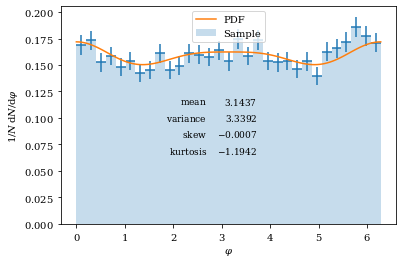

In [24]:
def phi_pdf(phi,vn,psin):
    from numpy import cos,newaxis,arange,atleast_1d
    vn   = atleast_1d(vn)
    psin = atleast_1d(psin)
    n    = arange(1,len(vn)+1)
    
    return 1+(vn*cos(n*(phi[...,newaxis]+psin))).sum(axis=-1)
        
from numpy import linspace, pi
from functools import partial
from matplotlib.pyplot import gca 

f           = partial(phi_pdf,vn=[0.01,0.05,0.02],psin=[0,0,0])
phi         = linspace(0,2*pi,121)
flow_rv     = rv_numerical(f,phi)
random_phis = flow_rv.rvs(size=10000)
hist        = histogram(random_phis,bins=31,normalize=True)
ax          = gca()
plot_hist(*hist,as_bar=True,color='C0',ecolor='C0',
          alpha=.25,label='Sample',ax=ax)
ax.plot(phi,flow_rv.pdf(phi),label='PDF')
ax.set_xlabel(r'$\varphi$')
ax.set_ylabel(r'$1/N\,\mathrm{d}N/\mathrm{d}\varphi$')
ax.legend();       

from warnings import catch_warnings, simplefilter

with catch_warnings():
    simplefilter("ignore")
    stats = flow_rv.stats(moments='mvsk')


ax.table([[f'$\mathrm{{{n}}}$',f'${v:.4f}$']
           for n,v in zip(['mean','variance','skew','kurtosis'],stats)],
         bbox=(.3,.3,.3,.3),edges='open',zorder=9);

## Opsummering 

Ovenover har vi formaliseret tanken om tilfældige variable mere ved at introducerer _sandsynlighedsfordelinger_ (PDF).  Vi har set på forskellige PDF'er og deres kumulative fordeslingsfunktioner (CDF).  Vi har set hvorledes vi kan bruge CDF'en til at laver prøver fra en given PDF, og vi har udvilket funktionerne `eval_cdf` of `sample_pdf` til dette formål. 

## Summary

Above, we have formalized the idea of random variables by introducing the _probability distributions_ (PDF). We have looked at various PDFs and their cumulative density functions (CDF). We have seen how we can use the CDF to generate samples from a given PDF, and we have developed the functions `eval_cdf` or` sample_pdf` for this purpose.

In [25]:
eval_cdf.__doc__=\
    """Integrates the PDF f over the range x to get a table of the CDF

    Example
    -------
    >>> cdf = eval_cdf(lambda x: x**2, np.linspace(0,10,11))
    
    Note, if the PDF is a multi-variate function (e.g. f(x,y)), then the 
    best way to use this function is to create a meshgrid over the domain of 
    the variables 
    
    >>> from numpy import meshgrid, linspace
    >>> x, dx  = linspace(0,2,20)
    >>> y, dy  = linspace(0,3,30)
    >>> xx, yy = meshgrid(x,y)
    
    and then flatten this to be (m,n) - where m is the number of variables
    
    >>> from numpy import vstack 
    >>> xy = vstack((xx.ravel(),yy.ravel()))
    
    A particular challenge to define the "step" length. If the evaluation 
    points are equidistant as above, we can simply do 
    
    >>> from numpy import zeros
    >>> dxy = zeros(len(xy[0]))
    >>> dxy[1:] = dx * dy 
    
    and then pass that to this function 
    
    >>> cdf = eval_cdf(f,xy,dxy)
    
    Parameters
    ----------
    f : callable 
        PDF to integrate 
    x : array-like
        Points to evalute the PDF at
    dx : array-like or None
        If given, it should specify the area of each integration
        point, with the first equal to zero.  This is useful 
        if the PDF is a function of several variables.  If not 
        given, assume we can calculate it using the difference of
        x 
    adjust : bool 
        This allows to sample even if the pdf is negative by adding 
        a constant. The constant is the minimum of the function over x 
        and raises the range of f above zero. Thereby the cdf is 
        monotonically increasing and is invertible.  
    
    Returns
    -------
    cdf : array-like
        table of CDF values at the points x 
      
    See also
    --------
    sample_pdf 
    """

In [26]:
sample_pdf.__doc__=\
    """Sample a PDF given by the table of the CDF

    Example
    -------
    >>> xev = np.linspace(0,10,11)
    >>> cdf = eval_cdf(lambda x: x**2, xev
    >>> x   = sample_pdf(np.random.uniform(size=100),xev,cdf)
    
    Parameters
    ----------
    y : scalar or array-like, float
        Uniformly distributed random variable 
    x : array-like
        Points where the CDF is evaluated 
    cdf : array-like 
        CDF evaluated at x 

    Return
    ------
    x : scalar or array-like, float 
        Random variable drawn from the PDF 
        
    See also
    --------
    eval_cdf 
    """

In [27]:
pdf_sampler.__doc__=\
    """Creates a function to sample a PDF 
    
    Examples
    --------
    
        >>> def f(x,mu,sigma):
        ...     from numpy import pi, sqrt, exp
        ...     return 1/(sqrt(2*pi)*sigma)*exp(-.5*((x-mu)/sigma)**2)
        ...     
        >>> from numpy import linspace
        >>> from numpy.random import uniform 
        >>>
        >>> sampler = pdf_sampler(f,linspace(-3,3,30))
        >>> sample  = sampler(uniform(size=1000))
        
    Parameters
    ----------
    f : callable 
        PDF to integrate 
    x : array-like
        Points to evalute the PDF at
    dx : array-like or None
        If given, it should specify the area of each integration
        point, with the first equal to zero.  This is useful 
        if the PDF is a function of several variables.  If not 
        given, assume we can calculate it using the difference of 
        x 

    Returns
    -------
    sampler : callable 
        A function which takes a single argument - random numbers between 0 and 1 
        and samples the PDF passed to this function. 
    """

In [28]:
from scipy.stats import rv_continuous
rv_numerical.__init__.__doc__ = \
    '''A continuous random variable sampled from a 
    generic PDF.  The PDF is evaluated numerically and 
    the CDF is determined.  The domain of the PDf is
    specified by the points where to evaluate the PDF.
    
    This conforms to the SciPy random variable interface
    
    Example
    -------
    
    >>> def phi_pdf(phi,vn,psin):
    ...     from numpy import cos,newaxis,arange,atleast_1d
    ...     vn   = atleast_1d(vn)
    ...     psin = atleast_1d(psin)
    ...     n    = arange(1,len(vn)+1)
    ...     
    ...     return 1+(vn*cos(n*(phi[...,newaxis]+psin))).sum(axis=-1)
    >>>    
    >>> from numpy import linspace, pi
    >>> from functools import partial
    >>> from matplotlib.pyplot import gca 
    >>> 
    >>> f           = partial(phi_pdf,vn=[0.01,0.05,0.02],psin=[0,0,0])
    >>> phi         = linspace(0,2*pi,121)
    >>> flow_rv     = rv_numerical(f,phi)
    >>> random_phis = flow_rv.rvs(size=10000)
    >>> hist        = histogram(random_phis,bins=31,normalize=True)
    >>> ax          = gca()
    >>> plot_hist(*hist,as_bar=True,color='C0',ecolor='C0',
    ...           alpha=.25,label='Sample',ax=ax)
    >>> ax.plot(phi,flow_rv.pdf(phi),label='PDF')
    >>> ax.set_xlabel(r'$\varphi$')
    >>> ax.set_ylabel(r'$1/N\,\mathrm{d}N/\mathrm{d}\varphi$')
    >>> ax.legend();
    
    Parameters
    ----------
    f : callable 
        The PDF to be evaluated.  This must only take 
        the independent variables as arguments.
    xev : numpy.ndarray 
        Where to evaluate the PDF 
    args : tuple
        Other arguments passed to scipy.stats.rv_continuous 
    kwargs : dict 
        Other keyword arguments passed to 
        scipy.stats.rv_continuous
        
        a : float, sequence 
            Lower bound on domain 
        b : float, sequence 
            Upper bound on domain
    '''
        
rv_numerical._pdf.__doc__ = \
    '''Evaluate the PDF at points 
    
    Parameters
    ----------
    x : numpy.ndarray 
        Where to evaluate the PDF
    args : tuple 
        Ignored 
    '''

rv_numerical._cdf.__doc__ = \
    '''Evaluate the CDF at points 
    
    Parameters
    ----------
    x : numpy.ndarray 
        Where to evaluate the CDF
    args : tuple 
        Ignored 
    '''
        
rv_numerical._ppf.__doc__ = \
    '''Evaluate the inverse CDF (the quantile function)
    at points 
    
    Parameters
    ----------
    y : numpy.ndarray 
        Where to evaluate the inverse CDF
    args : tuple 
        Ignored 
    '''